# **Telco Analytics: Customer Churn Analysis**
Created by: Revalde Raditya Candra

# **Business Problem Understanding**

**Context**

A telecommunications company (telco) that provides high-speed internet service. However, not all customers will stay with the current telco company. For this reason, the company wants to know why customers choose not to continue with the internet service they currently have.

**Churn**:

No/0: The customer continues with the current internet company.

Yes/1: The customer does not continue with the current internet company.

**Problem Statement**:

Telco companies make considerable investments in infrastructure to deliver their services. Therefore, when a customer decides to leave, it can lead to a significant loss of revenue, affecting the company's return on investment (ROI). The telecommunications sector is characterized by intense competition and market saturation. Customers often switch providers due to more attractive offers or superior services from competitors. High churn rates in a company could suggest issues related to service quality, pricing, or customer service. Additionally, many telco services depend on long-term contracts or service agreements. Consequently, if a customer decides not to renew their agreement or terminates it prematurely, it can result in financial losses and logistical complications for the company.

Given the challenges mentioned above, it's clear that customer attrition or churn can significantly impact various aspects of a business, most notably the financial sector. This is because when a customer decides to leave or chooses not to renew or terminate their contract, it results in financial losses for the company.

**Goals**: 

From the problem outlined above, it's apparent that customer churn negatively impacts the company. Therefore, Telco companies need to understand the characteristics of customers who are potentially at risk of churning. 

Moreover, they need to identify the factors contributing to customer churn so they can implement changes that effectively retain their customers.

**Analytic Approach**: 

The analytic approach that will be applied in this case involves the development, assessment, and deployment of a machine learning model. This model will aim to predict whether a customer will churn or not based on their history.

### Metrics Evaluation

**False Positive**: A false positive in this case would mean that the model wrongly predicts that a customer will churn when they actually do not. While a false positive might result in unnecessary resources being used to attempt to retain a customer who was not actually at risk of leaving, this is generally considered to be less problematic than a false negative.

**False Negative**: A false negative is when the model incorrectly predicts that a customer will not churn, when in fact they do. This is a more significant issue as the company could lose a customer without having had the opportunity to implement any retention strategies. A false negative can result in a direct loss of revenue, and the company may also incur additional costs to acquire new customers to replace the ones that were lost.

In this case **False Negatives** are typically considered more harmful in a churn prediction context because they represent missed opportunities for intervention. If a customer who is actually at risk of churning is incorrectly labeled as non-churning by the model, the company loses the chance to proactively retain that customer, resulting in a direct loss of revenue.

## Glosary

- Dependents: Whether the customer has dependents or not.
- Tenure: Number of months the customer has stayed with the company.
- OnlineSecurity: Whether the customer has online security or not.
- OnlineBackup: Whether the customer has online backup or not.
- InternetService: Whether the client is subscribed to Internet service.
- DeviceProtection: Whether the client has device protection or not.
- TechSupport: Whether the client has tech support or not 
- Contract: Type of contract according to duration.
- PaperlessBilling: Bills issued in paperless form.
- MonthlyCharges: Amount of charge for service on monthly bases.
- Churn: Whether the customer churns or not.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, r2_score, r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#imbalance
from imblearn.over_sampling import SMOTE

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


# **Data Preparation**

## **Data Cleaning**

In [3]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [4]:
#Show every unique value of every columns

pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


In [5]:
# Show the unique sample and the null percentage

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,73,"[63, 24]"
2,OnlineSecurity,object,0,0.0,3,"[Yes, No]"
3,OnlineBackup,object,0,0.0,3,"[No internet service, No]"
4,InternetService,object,0,0.0,3,"[No, Fiber optic]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No]"
6,TechSupport,object,0,0.0,3,"[Yes, No]"
7,Contract,object,0,0.0,3,"[Two year, Month-to-month]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[76.95, 59.95]"


Remove ``No Internet Service`` from multiple columns: Our main focus is on customers who are using the internet. There are several customers with a `No Internet Service` value, which indicates that these customers are using only television or cable telephone services. Therefore, these entries can be excluded from our analysis.

In [6]:
# Define the columns where you want to check for 'No internet service'
columns_to_check = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Create a condition that matches rows where any of the specified columns is 'No internet service'
condition = np.any([df[column] == 'No internet service' for column in columns_to_check], axis=0)

# Use this condition to drop these rows from the DataFrame
df = df.drop(df[condition].index)

Drop `Paperless Billing` Column: PaperlessBilling will be dropped since it only give information whether the bills issued in paperless form or not, therefore it can be concluded that this column is irrelevant and can be dropped.

In [7]:
df.drop(['PaperlessBilling'], axis=1, inplace=True)
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,69.65,No
5,Yes,40,No,No,DSL,Yes,No,Month-to-month,74.55,No


### **CHECK OUTLIERS**
Check outlier for `Monthly Charges` and `Tenure` columns because those 2 is the numerical column.

#### **CHECK OUTLIERS FOR MONTHLY CHARGES**

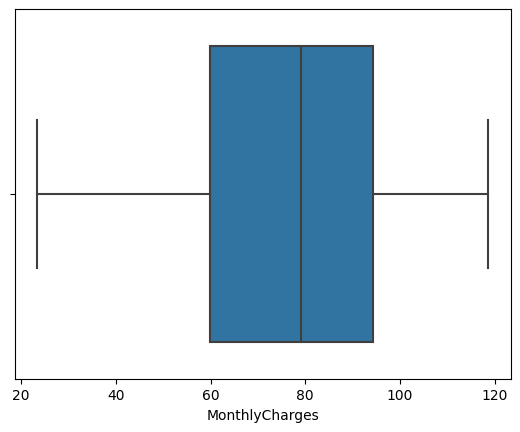

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,MonthlyCharges,Churn


In [8]:
# Assume df is your DataFrame and 'column' is the name of the column for which you want to check outliers
sns.boxplot(x=df['MonthlyCharges'])
plt.show()

# calculate Q1, Q3 and IQR
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identify outliers
outliers = df[(df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)]
display(outliers)

After get the IQR value and the boxplot for Monthly Charges, it can be proven that there is no outliers for Monthly Charges.

#### **CHECK OUTLIERS FOR TENURE**

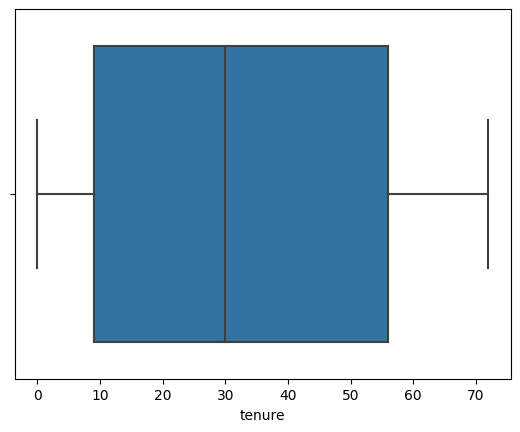

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,MonthlyCharges,Churn


In [9]:
# Assume df is your DataFrame and 'column' is the name of the column for which you want to check outliers
sns.boxplot(x=df['tenure'])
plt.show()

# calculate Q1, Q3 and IQR
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

# define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identify outliers
outliers = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]
display(outliers)

**Data Cleaning Conclusion**: 
This data does not contain any null values, and no outliers are present in the `tenure` and `MonthlyCharges` columns. However, the `PaperlessBilling` column appears to be irrelevant. It doesn't seem to influence whether a customer will churn, regardless of whether they receive their bills in paper or paperless form.

### **Check Duplicate**

In [10]:
df[df.duplicated()]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,MonthlyCharges,Churn
376,No,2,No,No,Fiber optic,No,No,Month-to-month,70.35,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,69.65,Yes
1294,No,1,No,No,Fiber optic,No,No,Month-to-month,69.85,Yes
1357,No,1,No,No,Fiber optic,No,No,Month-to-month,69.10,Yes
1430,No,1,No,No,Fiber optic,No,No,Month-to-month,74.45,Yes
1464,No,2,No,No,DSL,No,No,Month-to-month,44.60,Yes
1620,No,72,Yes,Yes,Fiber optic,Yes,Yes,Two year,115.15,No
1701,No,1,No,No,DSL,No,No,Month-to-month,45.30,Yes
2075,No,72,No,Yes,Fiber optic,Yes,Yes,Two year,109.75,No
2080,No,1,No,No,Fiber optic,No,No,Month-to-month,70.85,Yes


**Drop Duplicate**

In [11]:
df=df.drop_duplicates()
df[df.duplicated()]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,MonthlyCharges,Churn


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 4928
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        3833 non-null   object 
 1   tenure            3833 non-null   int64  
 2   OnlineSecurity    3833 non-null   object 
 3   OnlineBackup      3833 non-null   object 
 4   InternetService   3833 non-null   object 
 5   DeviceProtection  3833 non-null   object 
 6   TechSupport       3833 non-null   object 
 7   Contract          3833 non-null   object 
 8   MonthlyCharges    3833 non-null   float64
 9   Churn             3833 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 329.4+ KB


After the duplicated was dropped the number of data was decreased from 4930 become 3833 data.

### Data Cleaning Findings

- The `data_telco_customer_churn` contains 4931 rows and 11 columns.
- There are no columns that contain NaN values.
- The PaperlessBilling dropped since it not affecting whether the customer will be churn or not.
- The `No Internet Service` value will be dropped since this Notebook only make Machine Learning model whether the customer is going to churn or not for the customer that only use the internet.
- Since all the column is in string therefore it need to be encode process.
- No outliers were detected after checking using IQR.
- There is duplicate data found after using .duplicated()
- The duplicated data dropped therefore it become 4930 from 3833 data

# **Data Analysis**

## **Problem to Solve**

In [13]:
df['Churn'].value_counts()

No     2631
Yes    1202
Name: Churn, dtype: int64

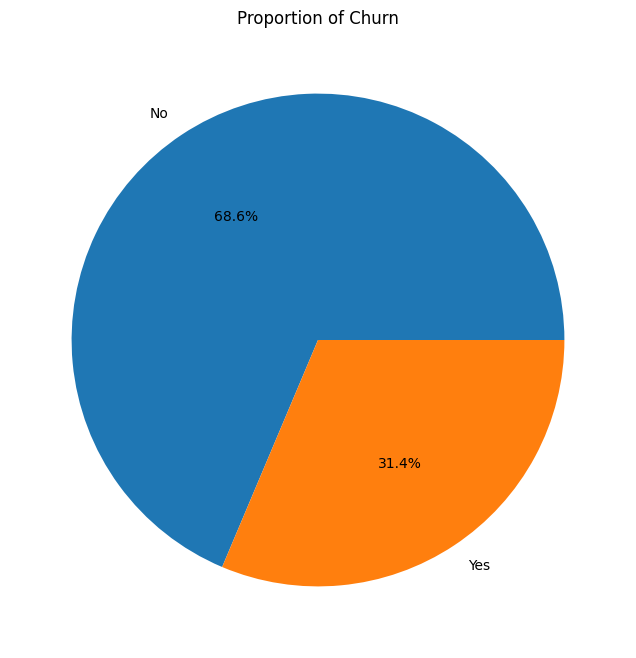

In [14]:
plt.figure(figsize=(8,8))
plt.pie(df['Churn'].value_counts(), labels = df['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Proportion of Churn')
plt.show()

It stated above that `Churn` column is the column that stated the problem for the Telco Company, however the data was imbalance therefore to make it into Machine Learning model `SMOTE` method will be applied later.

## **Dependents**

In [15]:
df_ct=pd.crosstab(df['Dependents'],df['Churn'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Yes',ascending=False)

Churn,No,Yes,Total
Dependents,,,
No,1786,995,2781
Yes,845,207,1052


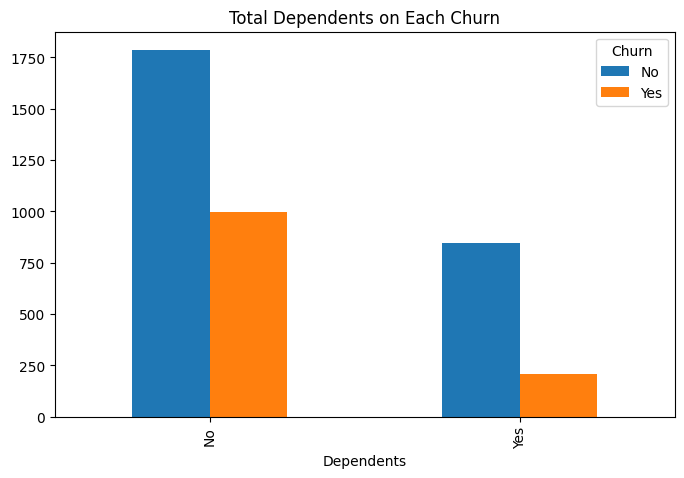

In [16]:
df_ct.sort_values('Yes',ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total Dependents on Each Churn')
plt.show()

Customers with dependents may have more financial responsibilities and could therefore be more price-sensitive, making them more likely to switch if they can find a more cost-effective service elsewhere. Therefore it can be concluded that dependents column could affecting the customer's decision whether to Churn or not.

## **Tenure**

In [17]:
df_ct1=pd.crosstab(df['tenure'],df['Churn'])
df_ct1['Total']=df_ct1.sum(axis=1)
df_ct1.sort_values('Yes',ascending=False)

Churn,No,Yes,Total
tenure,,,
1,81,205,286
2,48,79,127
3,48,60,108
4,32,49,81
5,33,39,72
...,...,...,...
62,31,3,34
45,30,3,33
63,42,2,44


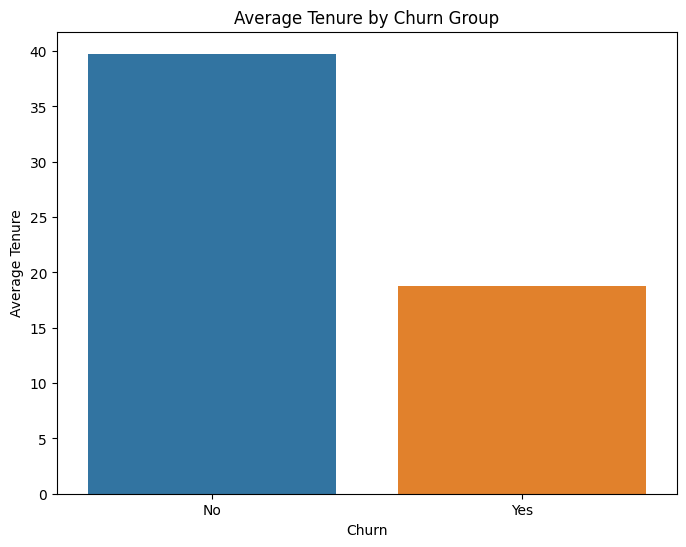

In [18]:
# Group by 'Churn' and calculate the average tenure
avg_tenure_by_churn = df.groupby('Churn')['tenure'].mean()

# Create a bar plot of the average tenure by 'Churn' group
plt.figure(figsize=(8,6))
sns.barplot(x=avg_tenure_by_churn.index, y=avg_tenure_by_churn.values)
plt.xlabel('Churn')
plt.ylabel('Average Tenure')
plt.title('Average Tenure by Churn Group')
plt.show()

From the crosstab and data visualizationabove it can be concluded that the customer with longer tenure tends to stay with the current telco company, it was proved on the crosstab since the top 5 Churn that have `Yes` answer was from month 1 until month 5. It means that customer loyalty can also affecting the customer decision whether they will Churn or not.

## **Online Security**

In [19]:
df_ct2=pd.crosstab(df['OnlineSecurity'],df['Churn'])
df_ct2['Total']=df_ct2.sum(axis=1)
df_ct2.sort_values('Yes',ascending=False)

Churn,No,Yes,Total
OnlineSecurity,,,
No,1416,990,2406
Yes,1215,212,1427


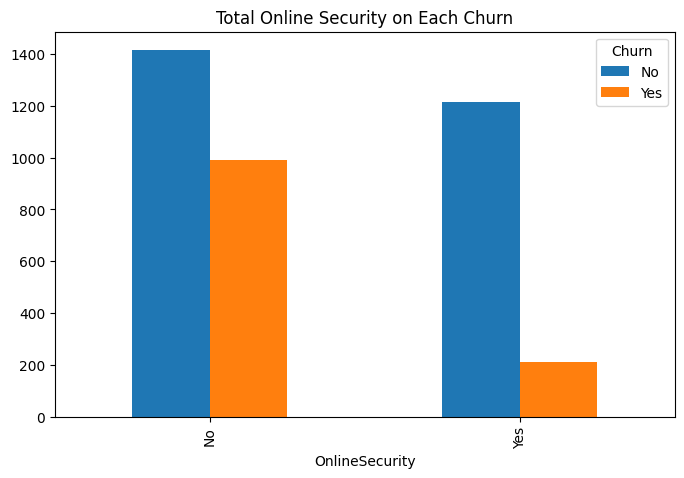

In [20]:
df_ct2.sort_values('Yes',ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total Online Security on Each Churn')
plt.show()

If a customer does not have online security, they may be more susceptible to internet threats such as viruses or hacking. This could lead to dissatisfaction with the service and increase the likelihood of churn. It showed in the graph that people without Online Security has higher total of Churn.

## **Online Backup**

In [21]:
df_ct3=pd.crosstab(df['OnlineBackup'],df['Churn'])
df_ct3['Total']=df_ct3.sum(axis=1)
df_ct3.sort_values('Yes',ascending=False)

Churn,No,Yes,Total
OnlineBackup,,,
No,1280,853,2133
Yes,1351,349,1700


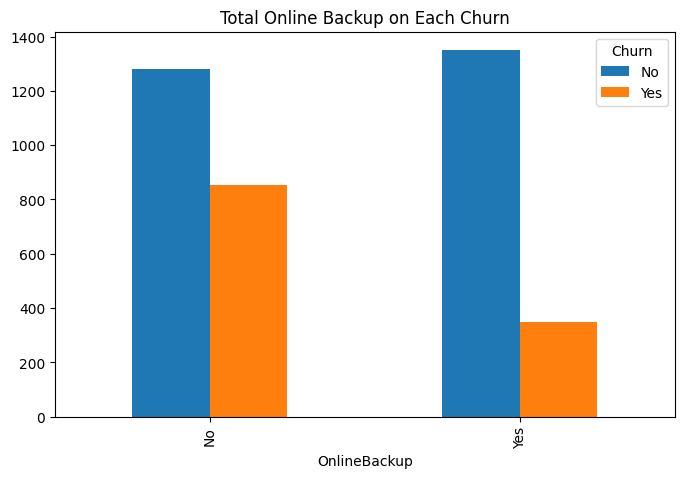

In [22]:
df_ct3.sort_values('Yes',ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total Online Backup on Each Churn')
plt.show()

Online backup is a critical service for many customers. Those without it could potentially lose important data, leading to dissatisfaction and an increased likelihood of churn.

## **Internet Service**

In [23]:
df_ct4=pd.crosstab(df['InternetService'],df['Churn'])
df_ct4['Total']=df_ct4.sum(axis=1)
df_ct4.sort_values('Yes',ascending=False)

Churn,No,Yes,Total
InternetService,,,
Fiber optic,1250,894,2144
DSL,1381,308,1689


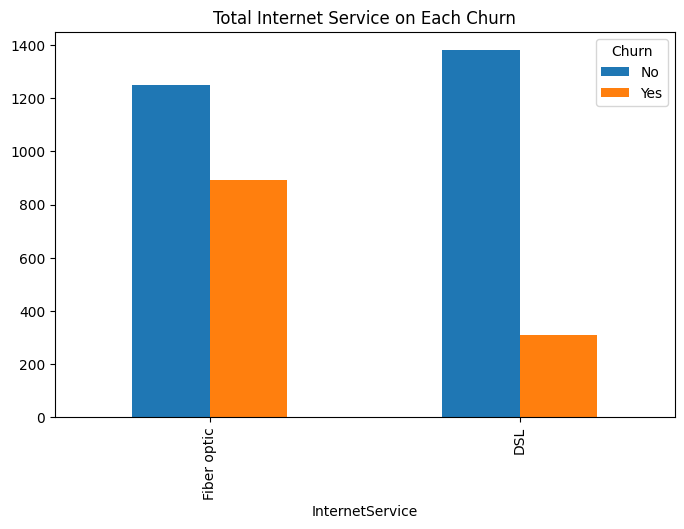

In [24]:
df_ct4.sort_values('Yes',ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total Internet Service on Each Churn')
plt.show()

The type of internet service a customer has can significantly affect their satisfaction. Poor internet service could lead to customer frustration and churn. It showed in the graph the customer that using DSL service has higher number that not churn, which is the objective that we want, therefore Internet service could affecting the Churn rate.

## **Device Protection**

In [25]:
df_ct5=pd.crosstab(df['DeviceProtection'],df['Churn'])
df_ct5['Total']=df_ct5.sum(axis=1)
df_ct5.sort_values('Yes',ascending=False)

Churn,No,Yes,Total
DeviceProtection,,,
No,1329,820,2149
Yes,1302,382,1684


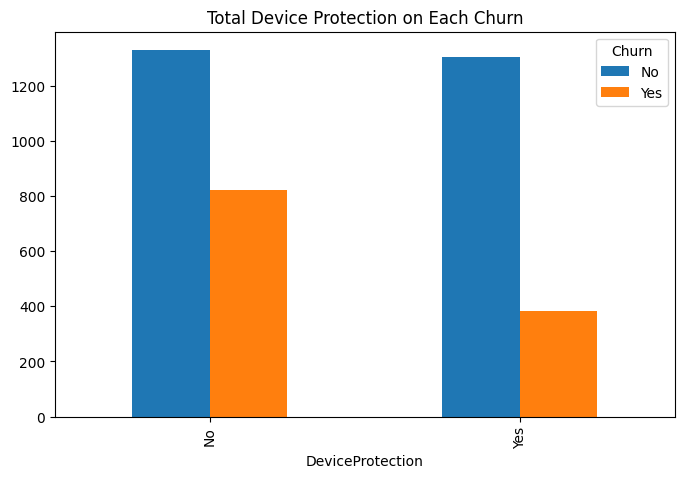

In [26]:
df_ct5.sort_values('Yes',ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total Device Protection on Each Churn')
plt.show()

If a customer's device breaks and they do not have device protection, they could incur significant costs to repair or replace the device. This could lead to dissatisfaction and potential churn.

## **Tech Support**

In [27]:
df_ct6=pd.crosstab(df['TechSupport'],df['Churn'])
df_ct6['Total']=df_ct6.sum(axis=1)
df_ct6.sort_values('Yes',ascending=False)

Churn,No,Yes,Total
TechSupport,,,
No,1439,988,2427
Yes,1192,214,1406


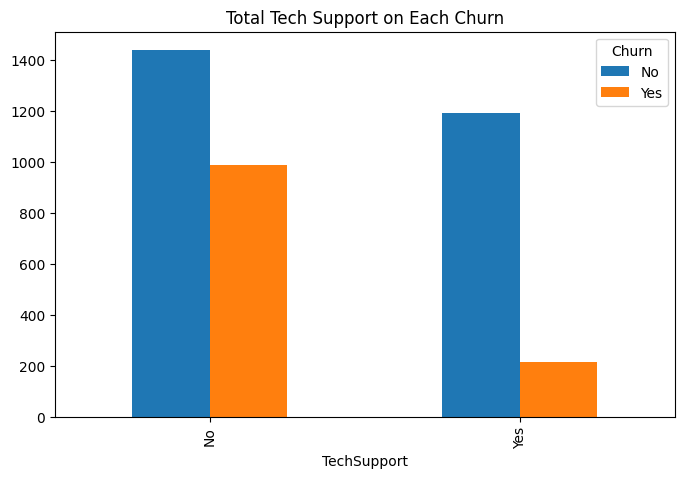

In [28]:
df_ct6.sort_values('Yes',ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total Tech Support on Each Churn')
plt.show()

Customers who experience technical issues and do not have access to tech support may become frustrated, leading to an increased likelihood of churn. It showed that customer without TechSupport has the highest count for no Churn therefore it could affecting the Churn column.

## **Contract**

In [29]:
df_ct7=pd.crosstab(df['Contract'],df['Churn'])
df_ct7['Total']=df_ct7.sum(axis=1)
df_ct7.sort_values('Yes',ascending=False)

Churn,No,Yes,Total
Contract,,,
Month-to-month,1246,1074,2320
One year,683,100,783
Two year,702,28,730


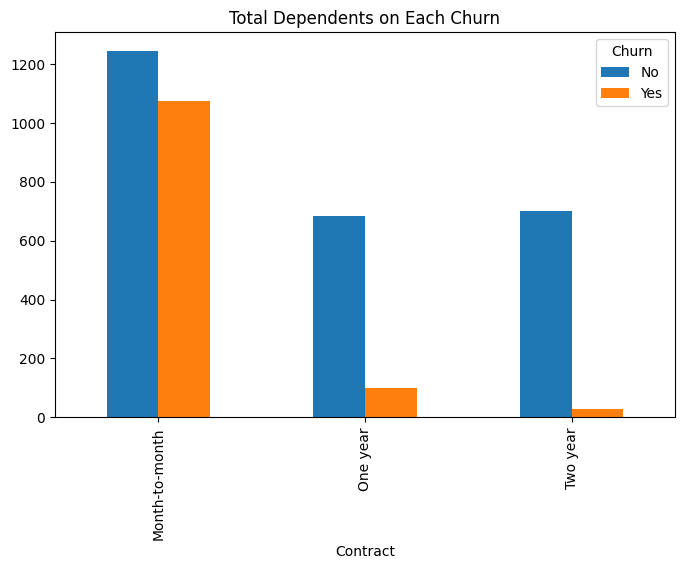

In [30]:
df_ct7.sort_values('Yes',ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total Dependents on Each Churn')
plt.show()

The contract type can also influence churn. Customers on a month-to-month contract have the flexibility to cancel their service at any time, which might lead to higher churn rates compared to those on longer-term contracts. It was proved since the customer with Contract type Month-to-Month has higher number on `Yes` rate on Churn column.

## **Monthly Charges**

In [31]:
df_ct8=pd.crosstab(df['MonthlyCharges'],df['Churn'])
df_ct8['Total']=df_ct8.sum(axis=1)
df_ct8.sort_values('Yes',ascending=False)

Churn,No,Yes,Total
MonthlyCharges,,,
74.40,2,8,10
74.90,2,7,9
94.40,3,6,9
80.85,4,6,10
78.95,4,5,9
...,...,...,...
66.15,3,0,3
66.20,1,0,1
66.30,1,0,1


In [32]:
df_ct9=pd.crosstab(df['MonthlyCharges'],df['Churn'])
df_ct9['Total']=df_ct9.sum(axis=1)
df_ct9.sort_values('MonthlyCharges',ascending=False)

Churn,No,Yes,Total
MonthlyCharges,,,
118.65,1,0,1
118.60,1,0,1
118.35,0,1,1
118.20,1,0,1
117.80,0,1,1
...,...,...,...
24.30,2,0,2
24.25,0,1,1
24.20,1,0,1


The cost of the service is a significant factor in customer satisfaction. If a customer feels they are paying too much, they may be more likely to look for a cheaper alternative and churn. However, in the data above it was proved on the second crosstab that the highest Monthly Charges was still using the service from the current telco company. Therefore they don't have any correlation.

## **Correlation**

In [33]:
# Check Correlation

dfcorr=df.corr()
dfcorr

,tenure,MonthlyCharges
tenure,1.000000,0.349092
MonthlyCharges,0.349092,1.000000


<Axes: >

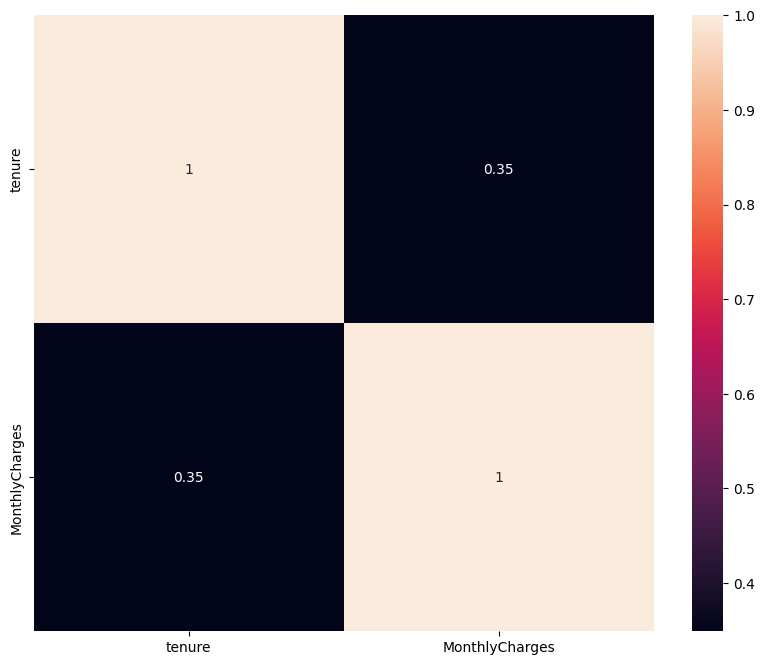

In [34]:
#Create Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(
    data=dfcorr,
    annot=True
    )

# **Best Model**

## **Preprocessing**

It is necessary to convert the values in the `Churn` column from `Yes` and `No` to 1 and 0, respectively. If we include the `Churn` column in the One-Hot Encoding process without this transformation, it results in a `ValueError: Invalid classes inferred from unique values of y. Expected: [0 1], got [`No` `Yes`]. Therefore, to avoid this error, we must first perform this conversion.`

In [35]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In [36]:
X= df.drop(columns=['Churn'])
y=df['Churn']

In [37]:
# Split Data

X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    train_size=0.8,
    stratify= y,
    random_state=20
)

We need to transform all the columns mentioned above into 1 and 0 because the columns `['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection','TechSupport','Contract', 'Churn']` consist of `Yes` and `No` values. Therefore, we chose to use One Hot Encoder for transformation, given that these columns only contain two distinct values.

However for the numerical column, Min-Max Scaler will be applied since there is no outliers in this data therefore Min-Max Scaler is safe option for this case.

In [38]:
transform= ColumnTransformer([
    ('encoders', OneHotEncoder(), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection','TechSupport'
                                   ,'Contract']),
    ('minmax', MinMaxScaler(), ['tenure', 'MonthlyCharges'])
], remainder='passthrough')

transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoders', OneHotEncoder(),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport',
                                  'Contract']),
                                ('minmax', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges'])])

In [39]:
testing = pd.DataFrame(transform.fit_transform(X_train),columns=transform.get_feature_names_out())
testing.head()

,encoders__Dependents_No,encoders__Dependents_Yes,encoders__OnlineSecurity_No,encoders__OnlineSecurity_Yes,encoders__OnlineBackup_No,encoders__OnlineBackup_Yes,encoders__InternetService_DSL,encoders__InternetService_Fiber optic,encoders__DeviceProtection_No,encoders__DeviceProtection_Yes,encoders__TechSupport_No,encoders__TechSupport_Yes,encoders__Contract_Month-to-month,encoders__Contract_One year,encoders__Contract_Two year,minmax__tenure,minmax__MonthlyCharges
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.013889,0.491293
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.319444,0.336675
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.388889,0.283905
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.013889,0.750396
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.222222,0.705013


After the OHE transform was done, it showed that all columns already changed to 1.0 and 0.0 therefore the OHE process was succeed.

## **Model Benchmarking: Cross-Val**

In [40]:
knn = KNeighborsClassifier()  # No random_state parameter
logreg = LogisticRegression()  # No random_state parameter
dt = DecisionTreeClassifier(random_state=20)
rf = RandomForestClassifier(random_state=20)
xgb = XGBClassifier(random_state=20, use_label_encoder=False, eval_metric='logloss')  # Updated for latest XGBoost version
lgbm = LGBMClassifier(random_state=20)
svc = SVC(random_state=20)

1. `KNeighborsClassifier()`: This is a K-nearest neighbors (KNN) classifier. It classifies a data point based on how its neighbors are classified.

2. `LogisticRegression()`: Logistic Regression is a statistical model that uses a logistic function to model a binary dependent variable, although extensions exist for multiclass classification as well.

3. `DecisionTreeClassifier(random_state=20)`: This is a Decision Tree classifier. Decision Trees classify instances by sorting them down the tree from the root to a leaf node, with the leaf node providing the classification of the instance.

4. `RandomForestClassifier(random_state=20)`: Random Forests are an ensemble learning method for classification that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees.

5. `XGBClassifier(random_state=20, use_label_encoder=False, eval_metric='logloss')`: XGBoost is an optimized distributed gradient boosting library, designed to be highly efficient, flexible, and portable. It provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

6. `LGBMClassifier(random_state=20)`: LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be distributed and efficient with the following advantages: faster training speed and higher efficiency, lower memory usage, better accuracy, support of parallel, distributed, and GPU learning, and capable of handling large-scale data.

7. `SVC()`: Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification or regression tasks.

Recall scoring method was chosen since a low recall means that many customers who churned were not predicted as such by the model. This could mean that opportunities for retention actions are missed and, consequently, potential revenue is lost. For businesses, it can be more costly to acquire new customers than to retain existing ones, so maximizing recall can be a key part of an effective customer retention strategy.

From a business perspective, recall in the context of churn prediction is about maximizing the detection of customers who are likely to leave (churn).

Recall, also known as sensitivity or true positive rate, is the proportion of actual positive cases (in this case, customers who churn) that the model correctly identified. High recall is important in a churn model because it indicates that the model is good at identifying those customers who are most likely to churn. This gives the business a chance to intervene and possibly prevent the customer from leaving, thus maintaining the customer relationship and preserving revenue.

In [41]:
models = [logreg,knn,dt,rf,xgb,lgbm, svc]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transform),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'SVC'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)

,mean recall,sdev
model,,
LightGBM,0.544225,0.034470
Logistic Regression,0.530710,0.035193
Decision Tree,0.527596,0.017564
KNN,0.519225,0.031022
XGBoost,0.508846,0.038892
Random Forest,0.497399,0.046293
SVC,0.476587,0.020963


We required the SMOTE method because the highest mean recall value was only 54%, achieved by the SVC model, which did not exhibit the lowest standard deviation. And SMOTE was needed since the data was imbalance.

## **Model Benchmarking: SMOTE**

In [42]:
models = [logreg,knn,dt,rf,xgb,lgbm, svc]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transform),
        ('smote', SMOTE(random_state=20)),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'SVC'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)


,mean recall,sdev
model,,
Logistic Regression,0.781450,0.015086
SVC,0.776252,0.019158
LightGBM,0.687829,0.008542
KNN,0.665987,0.019341
XGBoost,0.623262,0.034928
Random Forest,0.599417,0.027864
Decision Tree,0.562980,0.023241


### **Best Model Conclusion**

After SMOTE process was done, it can be concluded that the best model either Logistic Regression and SVC, therefore for the next step we will Hyperparameter Tuning for both of models, to find the best model that can give the best result.

# **Hyperparameter Tuning**
In this step, we will find the best tuning for both SVC and Logistic Regression, so we can get the best Train and Test Recall result.

## **Hyperparameter Tuning: SVC**

Support Vector Classifier can also be a good choice for churn prediction, especially when the churn cases are hard to separate linearly based on the given features. SVC can find the optimal boundary that maximizes the separation between churned and non-churned customers.

SVC's ability to use different kernel functions makes it versatile and capable of handling complex, non-linear relationships in the data. In cases where there are clear margins of separation in the data, SVC tends to work very well.

However, SVC's decision boundaries can be more difficult to interpret than those of logistic regression, and it requires proper feature scaling and parameter tuning to avoid overfitting or underfitting.

Below is the explaination for parameter for SVC

1. `C`: In Support Vector Machines (SVM), C is a regularization parameter that controls the trade off between the achieving a low training error and a low testing error. In other words, it controls the balance between overfitting (perfectly classifying all the training data at the risk of poor performance on unseen data) and underfitting (allowing some misclassifications in the training data to achieve potentially better generalization to unseen data). A smaller C allows some misclassifications and can create a wider margin, while a larger C strives for a perfect classification, creating a smaller margin. However, a larger C can lead to overfitting. Therefore, the parameter C in SVM controls the width of the margin and, consequently, the complexity and capacity of the SVM model.

2. `kernel`: The kernel function is one of the most important concepts in SVM. The choice of kernel function can drastically affect the performance of the SVM model. The kernel is responsible for transforming the input data into a higher-dimensional space where it is easier to find a hyperplane that separates the classes. In case of the `linear` kernel, it maintains the original space, and the decision boundary is a straight line (or a hyperplane in higher dimensions). Other common kernel functions are the `poly` (polynomial), `rbf` (Radial basis function), and `sigmoid`. But remember, the `linear` kernel does not perform any transformation of the original space.

3. `shrinking`: The shrinking heuristic is a technique used to speed up the training of the SVM model. During the training process, some of the Lagrange multipliers are found to be zero very early and remain zero till the end. The shrinking heuristic identifies these zero multipliers quickly and removes them from the optimization process, hence reducing the computational complexity. This speeds up the training, without affecting the model's performance. However, in some cases, the shrinking heuristic may lead to slightly worse solutions, therefore, it might be beneficial to turn it off (set `shrinking=False`) during parameter tuning.

4. `class_weight`: The class_weight parameter allows you to specify that the algorithm should "pay more attention" to samples from an under-represented class. This is done by assigning a higher weight to the under-represented class and a lower weight to the over-represented class.

In [43]:
# Define pipeline
pipeline = Pipeline([
    ('preprocess', transform),
    ('smote', SMOTE(random_state=20)),
    ('model', svc)
])

# Define more complex hyperparameters
hyperparameters = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__kernel': ['linear'],        # The kernel model option was only linear becase, only linear kernel that can be use for coef_ function later in the feature importance part
    'model__class_weight': [None, 'balanced'],
    'model__shrinking': [True, False]
}

# Create GridSearchCV object
grid_svc = GridSearchCV(pipeline, hyperparameters, cv=5, scoring='recall')

# Fit the model on the training data
grid_svc.fit(X_train, y_train)

# Get the best parameters
best_params = grid_svc.best_params_

print(f"Best parameters: {best_params}")

Best parameters: {'model__C': 0.01, 'model__class_weight': None, 'model__kernel': 'linear', 'model__shrinking': True}


## **Hyperparameter Tuning: Logistic Regression**

Logistic Regression works well for churn prediction because it not only predicts the class (churned or not churned) of a customer but also provides the probability of the class prediction. This means that you can rank customers by their probability of churning and then prioritize customer retention efforts accordingly.

Logistic Regression also has the benefit of being relatively simple and interpretable. It can handle both linear and non-linear effects (through the addition of interaction and power terms), and with proper regularization, it can avoid overfitting. 

Below is the hyperparameters for a Logistic Regression model:

1. `penalty`: This specifies the type of regularization applied to the model. Regularization is a technique used to prevent overfitting by adding an additional penalty to the loss function. The options are 'l1', 'l2', 'elasticnet', or 'none'. L1 and L2 regularization techniques can help in feature selection. L1 can yield sparse models while L2 tends to spread the feature weights across a range of features. 'Elasticnet' is a combination of L1 and L2. If 'none' is provided, then no regularization is applied.

2. `C`: This is the inverse of regularization strength. Like in Support Vector Machines, it controls the trade-off between achieving a low training error and a low testing error. A smaller C will increase the regularization strength which will create simpler models which underfit the data. Larger C will decrease the power of regularization which increases model complexity, leading to potential overfitting.

3. `solver`: This parameter specifies the algorithm to use in the optimization problem. Options are: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'. Different solvers work better for different types of data and should be chosen accordingly. For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones. For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss.

4. `max_iter`: Maximum number of iterations taken for the solvers to converge.

In [44]:
# Define pipeline
pipeline = Pipeline([
    ('preprocess', transform),
    ('smote', SMOTE(random_state=20)),
    ('model', logreg)
])

# Define more complex hyperparameters
hyperparameters = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [0.1, 1, 10, 100],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__max_iter': [100, 1000, 5000, 10000]
}

# Create GridSearchCV object
grid_logreg = GridSearchCV(pipeline, hyperparameters, cv=5, scoring='recall')

# Fit the model on the training data
grid_logreg.fit(X_train, y_train)

# Get the best parameters
best_params = grid_logreg.best_params_

print(f"Best parameters: {best_params}")

Best parameters: {'model__C': 0.1, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


# **Test Data after Hyperparameter Tuning**

## **Test Data for SVC**

In [51]:
# Instantiate logistic regression with the best parameters
svc_tuned = SVC(C=0.01, class_weight= None, kernel='linear', shrinking= True)

# Construct the pipeline
estimator_svc=Pipeline([
    ('preprocess',transform),
    ('smote', SMOTE(random_state=20)),
    ('model',svc_tuned)
])

# Fit the pipeline on the training data
estimator_svc.fit(X_train, y_train)

# Compute recall on the training set
train_pred = estimator_svc.predict(X_train)
train_recall = recall_score(y_train, train_pred)

# Compute recall on the test set
test_pred = estimator_svc.predict(X_test)
test_recall = recall_score(y_test, test_pred)

# Create a DataFrame with the results
df_results = pd.DataFrame({
    'model': ['SVC'],
    'Train Recall': [train_recall],
    'Test Recall': [test_recall],
}).set_index('model')

# Display the results
pd.DataFrame(df_results)

,Train Recall,Test Recall
model,,
SVC,0.895942,0.883817


## **Test Data for Logistic Regression**

In [46]:
# Instantiate logistic regression with the best parameters
logreg_tuned = LogisticRegression(C=0.1, max_iter=100, penalty='l2', solver='liblinear')

# Construct the pipeline
estimator_logreg=Pipeline([
    ('preprocess',transform),
    ('smote', SMOTE(random_state=20)),
    ('model',logreg)
])

# Fit the pipeline on the training data
estimator_logreg.fit(X_train, y_train)

# Compute recall on the training set
train_pred = estimator_logreg.predict(X_train)
train_recall = recall_score(y_train, train_pred)

# Compute recall on the test set
test_pred = estimator_logreg.predict(X_test)
test_recall = recall_score(y_test, test_pred)

# Create a DataFrame with the results
df_results = pd.DataFrame({
    'model': ['Logistic Regression'],
    'Train Recall': [train_recall],
    'Test Recall': [test_recall],
}).set_index('model')

# Display the results
pd.DataFrame(df_results)

,Train Recall,Test Recall
model,,
Logistic Regression,0.793965,0.804979


**Conclusion**: For the different models used, SVC had the second highest mean recall score, and the recall scores were quite similar for both the training and test datasets. This means that the SVC model was quite good at identifying the positive class and was not overfitting to the training data.

# **Feature Importance**

In [47]:
# Assuming 'grid' is your GridSearchCV object and it's already fit
best_model = grid_svc.best_estimator_

# Get feature names from the transformer
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()

# Get coefficients from the logistic regression model
coefs = best_model.named_steps['model'].coef_[0]

# Pair feature names with coefficients
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': coefs})

# Sort by the absolute values of the coefficients
feature_importances['abs_importance'] = feature_importances['importance'].abs()
feature_importances = feature_importances.sort_values(by='abs_importance', ascending=False)

# Now the DataFrame 'feature_importances' no longer has the 'importance' column
pd.DataFrame(feature_importances)

,feature,importance,abs_importance
12,encoders__Contract_Month-to-month,1.024167,1.024167
13,encoders__Contract_One year,-0.542476,0.542476
15,minmax__tenure,-0.486516,0.486516
14,encoders__Contract_Two year,-0.481691,0.481691
6,encoders__InternetService_DSL,-0.093514,0.093514
7,encoders__InternetService_Fiber optic,0.093514,0.093514
16,minmax__MonthlyCharges,0.084044,0.084044
10,encoders__TechSupport_No,0.080709,0.080709
11,encoders__TechSupport_Yes,-0.080709,0.080709
3,encoders__OnlineSecurity_Yes,-0.078802,0.078802


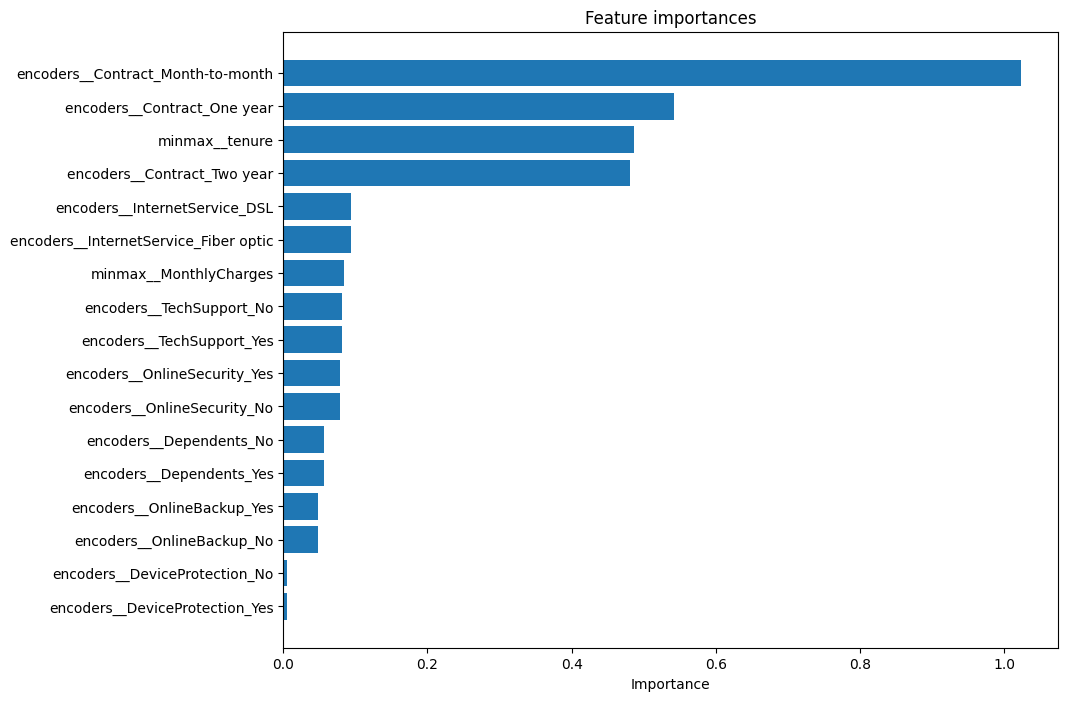

In [48]:
# Considering the top 20 features
top_features = feature_importances[:20]

plt.figure(figsize=(10, 8))
plt.barh(top_features['feature'], top_features['abs_importance'], align='center')
plt.xlabel("Importance")
plt.title("Feature importances")
plt.gca().invert_yaxis()  # Reverse the order of the features
plt.show()

1. The most important feature, according to the SVC model, is `encoders__Contract_Month-to-month` with a positive importance score of 1.024167. This means this feature has a significant positive influence on the target variable.

2. The second and third most important features are `encoders__Contract_One year` and `minmax__tenure`, but they have a negative influence on the target variable, with importance scores of -0.542476 and -0.486516 respectively.

3. Similarly, `encoders__Contract_Two year` also negatively influences the target variable, with an importance score of -0.481691.

4. The `encoders__InternetService_DSL` and `encoders__InternetService_Fiber optic` features have roughly equal but opposite influence on the target variable. This might suggest these are mutually exclusive categories (which would make sense given the feature names), and their effect on the target variable is different.

5. The features `encoders__DeviceProtection_No` and `encoders__DeviceProtection_Yes` have very low importance values, meaning they might not significantly influence the target variable in this model.

# **Conclusion**

The notebook presents a comprehensive analysis encompassing two distinct aspects: Technical and Business. Consequently, it culminates in two divergent yet equally noteworthy conclusions, each addressing the unique nuances and implications associated with their respective domains.

## **Conclusion: Technical Domains**

For this data, I chose to drop `PaperlessBilling` collumn since based on Domain Knowledge customer not choose to move to the compatitor based on how they receive their billing since it can be requested easily based on customer's request. Not only that, the `No Service` value on several collumn was also dropped since in this notebook type of customer that want to be predicted is the customer that has internet connection only therefore it was dropped. Not to mention that the data has some duplicate value therefore it got dropped, beside that the data was cleaned since there is no missing value or NaN value.

After cleaning the data, the next step is define the X and y feature, in this case the X is all the column without `Churn` column since the `Churn` column is the y column. Since `Churn` column is the indicator to tell us whether the customer move to competitor or not. After that the next step is to Pre-processing the data using `OneHotEncoders` for all column except `Tenure` and `MonthlyCharges` column since those two columns is numerical column therefore the method that will be applied is Scaling those two columns, in this case I use `MinMaxScaler` since the data has no missing value therefore it is safe to use this scaler.

After that, the next step is to Cross-val it using to get the recall mean value to get the best model to tuning later, it resulted that LightGBM is the best model with 0.55. However, since this data was imbalance, the `SMOTE` process must be done to get more accurate result. After the `SMOTE` was done, the result become better since now the best result was on Logistic Regression with 78% but the second best model is SVC with 77.6% and the third place result was placed by LighGBM with only 68%. Therefore since the result of first and second place compared with third place is quite far, it was decided that Logistic Regression and SVC will be two model that will be tuned later.

In the Hyperparameter Tuning process, the parameter for SVC was only set for `linear` kernel only since we need to use `coef_` later in the feature importance code, therefore the parameter fewer compared to Logistic Regression's parameter. After the tuning process was done, now the next step is to use the tuning to test the data for each models, to get the best train Recall and test Recall result. It was proved that SVC has the best result, since the Train and Test Recall was at 89.6% and 88.4% respectively, on the other side Logistic Regression result was only 79.3% for Train Recall and 80.4% for Test Recall result.

After test data was done, now the next step is to get the feature importance code and show out the graph, and it was proved that `Contract` column has the highest score especially for Month-to-Month and One year value.

In [55]:
from sklearn.metrics import recall_score

# Instantiate the default model
estimator_svc_default = Pipeline([
    ('preprocess',transform),
    ('smote', SMOTE(random_state=20)),
    ('model',SVC())
])

# Fit the default model
estimator_svc_default.fit(X_train, y_train)

# Instantiate the tuned model
svc_tuned = SVC(C=0.01, class_weight= None, kernel='linear', shrinking= True)
estimator_svm_tuned = Pipeline([
    ('preprocess',transform),
    ('smote', SMOTE(random_state=20)),
    ('model',svc_tuned)
])

# Fit the tuned model
estimator_svm_tuned.fit(X_train, y_train)

# Get predictions from the default model
y_pred_default = estimator_svc_default.predict(X_test)

# Get predictions from the tuned model
y_pred_tuned = estimator_svm_tuned.predict(X_test)

# Calculate recall scores
recall_score_default = recall_score(y_test, y_pred_default)
recall_score_tuned = recall_score(y_test, y_pred_tuned)

print('Recall Score Default SVC : ', recall_score_default)
print('Recall Score Tuned SVC : ', recall_score_tuned)


Recall Score Default SVC :  0.8008298755186722
Recall Score Tuned SVC :  0.8838174273858921


In [57]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default SVC : \n', report_default)
print('Classification Report Tuned SVC : \n', report_tuned)

Classification Report Default SVC : 
               precision    recall  f1-score   support

           0       0.88      0.69      0.77       526
           1       0.54      0.80      0.65       241

    accuracy                           0.72       767
   macro avg       0.71      0.74      0.71       767
weighted avg       0.78      0.72      0.73       767

Classification Report Tuned SVC : 
               precision    recall  f1-score   support

           0       0.91      0.55      0.69       526
           1       0.48      0.88      0.62       241

    accuracy                           0.66       767
   macro avg       0.69      0.72      0.65       767
weighted avg       0.77      0.66      0.67       767



In the codes above it was proved that the tuned SVC has better result compared to default tuned and it has 8% difference, it also showed in the classification report that recall score of 1 is getting better, therefore the tuning that applied is the best parameter that can be used for SVC.

## **Conclusion: Business Domains**

From a business perspective, our analysis shows that the contract type significantly influences customer behavior in the telecom sector. Particularly, customers with month-to-month contracts are more likely to contribute positively to our business outcomes, while those on one-year and two-year contracts tend to contribute less favorably. 

Additionally, the tenure of a customer, represented by 'minmax__tenure', has a substantial effect. Interestingly, the longer a customer stays with us, the more it seems to negatively influence the business outcome, indicating the importance of focusing not only on retaining customers but also on their level of engagement and satisfaction throughout their journey with us.

The type of internet service a customer subscribes to also plays a crucial role. Those using our Fiber optic service are positively influencing our business outcomes, while DSL subscribers appear to contribute less favorably. This could suggest a higher level of customer satisfaction or value derived from the Fiber optic service.

Another noteworthy observation is the impact of monthly charges, represented by 'minmax__MonthlyCharges'. Higher monthly charges seem to contribute positively to our business outcomes. Therefore, exploring pricing strategies and ensuring the value proposition matches these charges is essential.

The analysis further reveals that tech support usage plays a significant role. Curiously, customers who do not avail of tech support tend to contribute more positively than those who do. This highlights the need to scrutinize our tech support's role and effectiveness, as it may imply that those requiring tech support encounter more issues or less satisfaction.

Lastly, factors like Online Security, the presence of Dependents, and usage of Online Backup also impact business outcomes to varying degrees. Each offers valuable insights into different aspects of our customer base and can inform our strategies moving forward. Overall, these insights underscore the importance of a nuanced understanding of our customers' preferences, behaviors, and needs in optimizing our business outcomes.

# **Recommendation**

Based on the given feature importance results, here are some business recommendations for the telecom company:

1. **Focus on Contract Duration:** The type of contract a customer has (`encoders__Contract_Month-to-month`, `encoders__Contract_One year`, `encoders__Contract_Two year`) appears to significantly influence customer behavior. Month-to-month customers seem more likely to churn, while customers on longer-term contracts (one and two-year contracts) are less likely to churn. Therefore, the company should consider strategies to encourage customers to opt for longer-term contracts. These could include offering discounts or special features that are only available with long-term contracts.

2. **Enhance Customer Retention Efforts Based on Tenure:** The negative importance of `minmax__tenure` indicates that the longer a customer stays with the company, the less likely they are to churn. Thus, retention efforts should be increased for newer customers, and loyalty/reward programs could be implemented to encourage customers to stay longer.

3. **Evaluate Internet Services:** There are different effects on the target variable between the DSL service (`encoders__InternetService_DSL`) and the fiber optic service (`encoders__InternetService_Fiber optic`). It appears that customers using fiber optic services are more likely to churn compared to those using DSL services. It would be beneficial to investigate why this is happening. Is there a problem with the fiber optic service quality or price? Feedback from customers could be helpful in this case.

4. **Improve Online Security and Tech Support Services:** Features related to online security (`encoders__OnlineSecurity_No`, `encoders__OnlineSecurity_Yes`) and tech support (`encoders__TechSupport_No`, `encoders__TechSupport_Yes`) also play a significant role in influencing customer behavior. This suggests that customers value these services, and improvements in these areas could potentially reduce customer churn.